### Warm-Up Exercise : Temperature Difference In Cake Recipes

2022 05 December

In [13]:
from pydataset import data

import pandas as pd

import scipy.stats as stats

data('cake')

,replicate,recipe,temperature,angle,temp
1,1,A,175,42,175
2,1,A,185,46,185
3,1,A,195,47,195
4,1,A,205,39,205
5,1,A,215,53,215
...,...,...,...,...,...
266,15,C,185,28,185
267,15,C,195,25,195
268,15,C,205,25,205
269,15,C,215,31,215


HYPOTHESES

$H_0$ : The average baking temperatures amongst Cake A, Cake B and Cake C is equal. 
($\mu_{a} == \mu_{b} == \mu_{c}$)  

$H_a$ : The average baking temperatures amongst Cake A, Cake B and Cake C is NOT equal.  
($\mu_{a} ≠ \mu_{b}$ OR $\mu_{a} ≠ \mu_{c}$ OR $\mu_{b} ≠ \mu_{c}$) 

In [6]:
cake = data('cake')
cake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 1 to 270
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   replicate    270 non-null    int64 
 1   recipe       270 non-null    object
 2   temperature  270 non-null    int64 
 3   angle        270 non-null    int64 
 4   temp         270 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 12.7+ KB


In [7]:
cake['recipe'].value_counts()

A    90
B    90
C    90
Name: recipe, dtype: int64

In [9]:
temp_cake_A = cake[cake.recipe == 'A'].temperature
temp_cake_B = cake[cake.recipe == 'B'].temperature
temp_cake_C = cake[cake.recipe == 'C'].temperature

In [25]:
t, p = stats.levene(temp_cake_A, temp_cake_B, temp_cake_C)
t, p

# Levene tests variances

# Anova tests the differences in means : Like the T-Test, but useable when more than 2 groups

(0.0, 1.0)

In [20]:
print(temp_cake_A.mean())
print(temp_cake_B.mean())
print(temp_cake_C.mean())

200.0
200.0
200.0


In [22]:
stats.ttest_ind(temp_cake_A, temp_cake_B, equal_var = True)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [35]:
α = 0.05

if p < α:
    print("Reject null hypothesis.")
if p > α:
    print('Fail to reject the null hypothesis.')

Fail to reject the null hypothesis.


### Correct way : ANOVA 

( > 2 groups)

INDEPENDENT = yes  
NUMBER OF OBSERVATIONS = yes  
EQUAL VARIANCE = yes (due to Levene's test)


<AxesSubplot:>

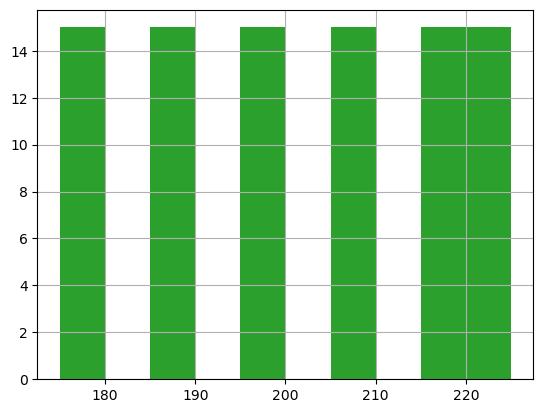

In [30]:
temp_cake_A.hist()
temp_cake_B.hist()
temp_cake_C.hist()

In [31]:
t1, p1 = stats.f_oneway(temp_cake_A, temp_cake_B, temp_cake_C)
t1, p1

(0.0, 1.0)

In [34]:

if p1 < α:
    print("Reject null hypothesis.")
if p1 > α:
    print('Fail to reject the null hypothesis.')

Fail to reject the null hypothesis.
